# Machine Learning: Background and techniques

In [1]:
import numpy as np  
import scipy as sp
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline

### Cluster analysis: k-means clustering by hand

#### The problem
Let's assume that we have a bunch of data for a pair of properties for a number of samples. We won't worry for now about what these propeties are, but they could, in principle, be any kind of data, either continuous variables or category data. The methods we will use are also not restricted to two-dimensions: we could deal with many more properties at the same time.

As an example, we could imagine that we have made a number of micr-hardness indents across the microstructure of some material and recorded the hardness and pop-in load at a series of points. We are now interested in discovering if these measurements fall into any kind of pattern. Perhaps certain ranges of hardness and pop-in load tend to occur together. Perhaps these groups of points correspond to different phases in the material, but the first thing we need to do is look to see if there is any such pattern in the data.

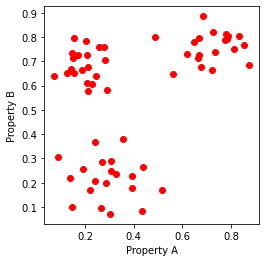

In [2]:
nclusters = 3
data = np.loadtxt('Data/clusterdata.txt', delimiter=',')
plt.scatter(data[:,0],data[:,1],marker='o', color='r')
plt.xlabel('Property A')
plt.ylabel('Property B')
plt.gca().set_aspect('equal')

In [ ]:
# samples fall into 3 distinct clusters

In [ ]:
# picking three data points at random to serve as initial guesses for cluster centre (as black triangles)

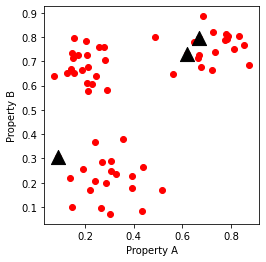

In [3]:
centres = data[np.random.randint(0,np.size(data,0),nclusters),:]
plt.scatter(data[:,0],data[:,1],marker='o', color='r')
plt.scatter(centres[:,0],centres[:,1],marker='^', color='k', s=200)
plt.xlabel('Property A')
plt.ylabel('Property B')
plt.gca().set_aspect('equal')

In [ ]:
# classifying all the points into 3 clusters based on which initial cluster centres is the closest

In [4]:
def classify(data,centres):
    cluster_id = np.zeros(np.size(data,0), dtype=int) # creating an empty array to hold the cluster identities
    nclusters = np.size(centres,0)
    for i in range(np.size(data,0)):
        mind = 9999.0
        for s in range(nclusters):
            d = np.linalg.norm(data[i,:]-centres[s,:])
            if d < mind:
                mind = d
                cluster_id[i] = s
    return cluster_id

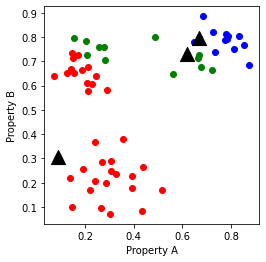

In [5]:
cluster_id = classify(data,centres) # running the clustering function

color = ['r','g','b']
for s in range(nclusters):
    plt.scatter(data[(cluster_id == s),0],data[(cluster_id == s),1],marker='o', color=color[s])
plt.scatter(centres[:,0],centres[:,1],marker='^', color='k', s=200)
plt.xlabel('Property A')
plt.ylabel('Property B')
plt.gca().set_aspect('equal')

In [ ]:
# points not perfectly classified due to initial cluster centres choice not ideal

In [ ]:
# Finding the centres of newly defined (imperfect) clusters which is the average value of the coordinates of the points in each cluster

In [6]:
def getcentres(data,cluster_id,centres):
    nclusters = np.size(centres,0)
    count = np.zeros(nclusters, dtype=int)
    centres[:,:] = 0
    for i in range(np.size(data,0)):
        count[cluster_id[i]] = count[cluster_id[i]] + 1
        centres[cluster_id[i]] = centres[cluster_id[i]] + data[i,:]
    centres[:,0] = centres[:,0]/count[:]
    centres[:,1] = centres[:,1]/count[:]
    return

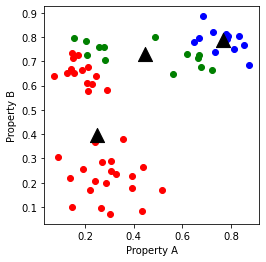

In [7]:
getcentres(data,cluster_id,centres)
for s in range(nclusters):
    plt.scatter(data[(cluster_id == s),0],data[(cluster_id == s),1],marker='o', color=color[s])
plt.scatter(centres[:,0],centres[:,1],marker='^', color='k', s=200)
plt.xlabel('Property A')
plt.ylabel('Property B')
plt.gca().set_aspect('equal')

In [ ]:
# repeat process of classifiying the points according to their distance from the new cluster centres then finding new cluster centres

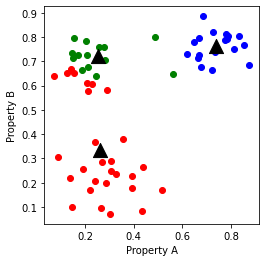

In [8]:
cluster_id = classify(data,centres)
getcentres(data,cluster_id,centres)
for s in range(nclusters):
    plt.scatter(data[(cluster_id == s),0],data[(cluster_id == s),1],marker='o', color=color[s])
plt.scatter(centres[:,0],centres[:,1],marker='^', color='k', s=200)
plt.xlabel('Property A')
plt.ylabel('Property B')
plt.gca().set_aspect('equal')

In [ ]:
# interate through the cluster assignment and centre determination process a few more times and check result

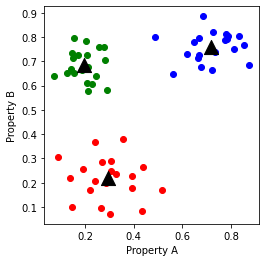

In [9]:
ntries = 10
for i in range(ntries):
    cluster_id = classify(data,centres)
    getcentres(data,cluster_id,centres)
for s in range(nclusters):
    plt.scatter(data[(cluster_id == s),0],data[(cluster_id == s),1],marker='o', color=color[s])
plt.scatter(centres[:,0],centres[:,1],marker='^', color='k', s=200)
plt.xlabel('Property A')
plt.ylabel('Property B')
plt.gca().set_aspect('equal')

### Using scikit-learn: k-means clustering the easy way

In [10]:
from sklearn.cluster import KMeans
nclusters = 3
data = np.loadtxt('Data/clusterdata.txt', delimiter=',')
kmeans = KMeans(n_clusters = nclusters)
kmeans.fit(data)

KMeans(n_clusters=3)

In [ ]:
# accessing variables and view the results of the clustering

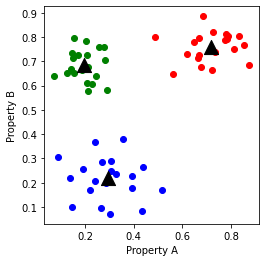

In [11]:
color = ['r','g','b']
for s in range(nclusters):
    plt.scatter(data[(kmeans.labels_ == s),0],data[(kmeans.labels_ == s),1],marker='o', color=color[s])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='^', color='k', s=200)
plt.xlabel('Property A')
plt.ylabel('Property B')
plt.gca().set_aspect('equal')

### A trickier clustering example - using alternative algorithms

Text(0, 0.5, 'Property B')

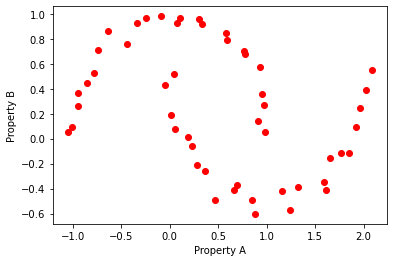

In [12]:
data = np.loadtxt('Data/moonclusterdata.txt', delimiter=',')
plt.scatter(data[:,0],data[:,1],marker='o', color='r')
plt.xlabel('Property A')
plt.ylabel('Property B')

#### <span style="color: red"> Task 2:</span> Try out the k-means method (using scikit learn or our own `classify` and `getcentres` functions) to classify the data into two clusters.
Plot the results of the clustering to see how well the algorithm has performed.

[[ 1.58795585 -0.34689819]
 [ 2.08780535  0.548649  ]]


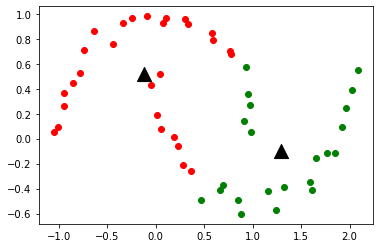

In [13]:
nclusters = 2
clusters = np.zeros(np.size(data,0), dtype=int)
centres = data[np.random.randint(0,np.size(data,0),nclusters),:]
print(centres)

ntries = 10
for i in range(ntries):
    cluster_id = classify(data,centres)
    getcentres(data,cluster_id,centres)
for s in range(nclusters):
    plt.scatter(data[(cluster_id == s),0],data[(cluster_id == s),1],marker='o', color=color[s])
plt.scatter(centres[:,0],centres[:,1],marker='^', color='k', s=200)

Text(0, 0.5, 'Property B')

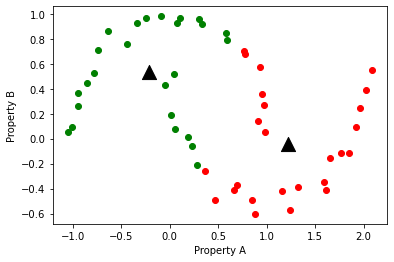

In [14]:
from sklearn.cluster import KMeans
nclusters = 2
kmeans = KMeans(n_clusters = nclusters)
kmeans.fit(data)

for s in range(nclusters):
    plt.scatter(data[(kmeans.labels_ == s),0],data[(kmeans.labels_ == s),1],marker='o', color=color[s])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='^', color='k', s=200)
plt.xlabel('Property A')
plt.ylabel('Property B')

#### An alternative clustering algorithm: DBSCAN
Fortunately scikit-learn includes many different algorithms to try out and they are all easily accessible. To show how easy it is to use scikit-learn, I have approached this problem from a position of complete ignorance about how to proceed and using only information obtained through an internet search engine to guide me. The below cell contains the code that I came up with. It uses the unsupervised learning algorithm DBSCAN to correctly cluster this trickier data set. 

Text(0, 0.5, 'Property B')

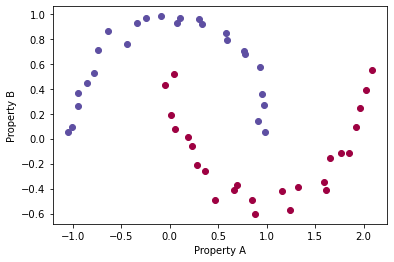

In [15]:
from sklearn.cluster import DBSCAN
data = np.loadtxt('Data/moonclusterdata.txt', delimiter=',')
db = DBSCAN(eps=0.4, min_samples=2).fit(data)
nclusters = len(set(db.labels_))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, nclusters)]
for s in range(nclusters):
    plt.scatter(data[(db.labels_ == s),0],data[(db.labels_ == s),1],marker='o', color=colors[s])
plt.xlabel('Property A')
plt.ylabel('Property B')

#### <span style="color: red"> Task 3:</span>  Try out some alternative values of epsilon and min_samples and observe the results.

Text(0, 0.5, 'Property B')

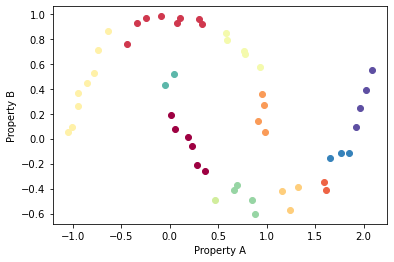

In [16]:
db = DBSCAN(eps=0.2, min_samples=1).fit(data)
nclusters = len(set(db.labels_))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, nclusters)]
for s in range(nclusters):
    plt.scatter(data[(db.labels_ == s),0],data[(db.labels_ == s),1],marker='o', color=colors[s])
plt.xlabel('Property A')
plt.ylabel('Property B')

In [ ]:
# DBSCAN algorithm needs careful tuning, but is capable of coping with the curved boundary between clusters

## Supervised  learning

### Learning preassigned classes: a support vector machine 

Text(0, 0.5, 'Property B')

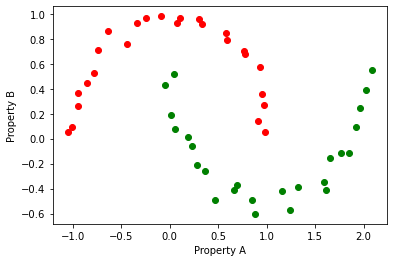

In [17]:
trainingdata = np.loadtxt('Data/moonclusterdata.txt', delimiter=',')
trainingclasses = np.loadtxt('Data/moonclusterclasses.txt', delimiter=',')

nclusters = 2
color = ['r','g','b']
for s in range(nclusters):
    plt.scatter(trainingdata[(trainingclasses == s),0],data[(trainingclasses == s),1],marker='o', color=color[s])
plt.xlabel('Property A')
plt.ylabel('Property B')

Using the above data, which consists of pairs of input properties along with known classes, to train the *support vector machine* (SVM) classifier. This data is referred to as *training data*. 

In [18]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=100, gamma=1.0).fit(trainingdata,trainingclasses)

In [ ]:
# using SVM to predict and visualise the classes of a set of test data where the class of each point is known

Text(0, 0.5, 'Property B')

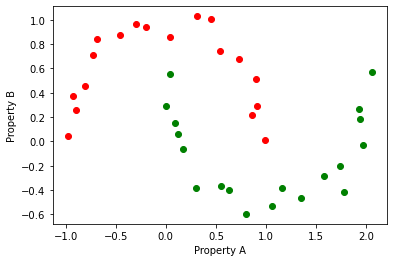

In [19]:
testdata = np.loadtxt('Data/moonclustertestdata.txt', delimiter=',')
predictedclasses = svm.predict(testdata)

for s in range(nclusters):
    plt.scatter(testdata[(predictedclasses == s),0],testdata[(predictedclasses == s),1],marker='o', color=color[s])
plt.xlabel('Property A')
plt.ylabel('Property B')

In [ ]:
# comparing the predictions with the actual classes of the test data

In [20]:
testclasses = np.loadtxt('Data/moonclustertestclasses.txt', delimiter=',')
print('Percentage correctly classified: ' + str(np.sum(testclasses==predictedclasses)/np.size(testclasses)*100) + '%')
print(testclasses==predictedclasses)

Percentage correctly classified: 97.2972972972973%
[ True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]


It can be observed that the fourth point has been classified incorrectly.

In [ ]:
# using a plot to visualise which is the 4th point (by a triangle marker)

Text(0, 0.5, 'Property B')

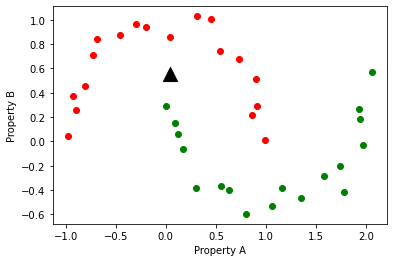

In [21]:
for s in range(nclusters):
    plt.scatter(testdata[(predictedclasses == s),0],testdata[(predictedclasses == s),1],marker='o', color=color[s])
plt.scatter(testdata[(predictedclasses != testclasses),0],testdata[(predictedclasses != testclasses),1], marker='^', color='k', s=200)
plt.xlabel('Property A')
plt.ylabel('Property B')

In [ ]:
# visualising the decision boundary (used to determine the classes of different points in a 2D property space) to work what went wrong

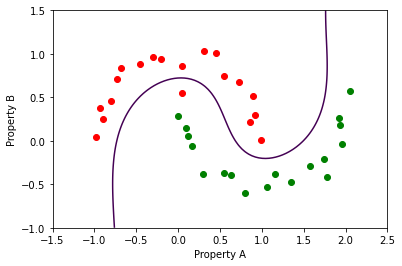

In [22]:
X1, X2 = np.meshgrid(np.linspace(-1.5, 2.5, 100), np.linspace(-1.0, 1.5, 100))
X_grid = np.c_[X1.ravel(), X2.ravel()]
decision_values = svm.decision_function(X_grid)
fill_levels = [decision_values.min()] + [0] + [
            decision_values.max()]

for s in range(nclusters):
    plt.scatter(testdata[(testclasses == s),0],testdata[(testclasses == s),1],marker='o', color=color[s])
plt.xlabel('Property A')
plt.ylabel('Property B')
ax = plt.gca()
ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=[0])

In the above plot, the points are coloured according to the correct classification. It is observed that the problematic point falls on the wrong side of the decision boundary. This highlights the importance of using a test set of data to measure the performance of a trained classifier.

#### Tuning the SVM
Taking two parameters: `C` and `gamma`, which control the shape and smoothness of the decision boundary.

#### <span style="color: red"> Task 4:</span>   Explore the effect on the decision boundary of changing the parameters of the SVM.

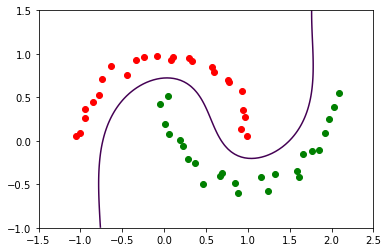

In [23]:
C = 100
gamma = 1.0

svm = SVC(kernel='rbf', C=C, gamma=gamma).fit(trainingdata,trainingclasses)

X1, X2 = np.meshgrid(np.linspace(-1.5, 2.5, 100), np.linspace(-1.0, 1.5, 100))
X_grid = np.c_[X1.ravel(), X2.ravel()]
decision_values = svm.decision_function(X_grid)
fill_levels = [decision_values.min()] + [0] + [
            decision_values.max()]

for s in range(nclusters):
    plt.scatter(trainingdata[(trainingclasses == s),0],trainingdata[(trainingclasses == s),1],marker='o', color=color[s])
ax = plt.gca()
ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=[0])

#### Over-fitting 

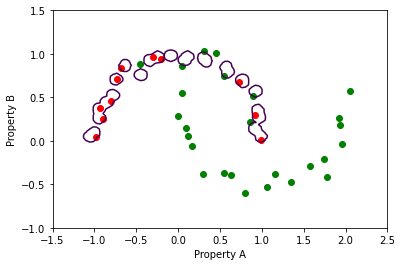

In [24]:
C = 100
gamma = 1000.0

svm = SVC(kernel='rbf', C=C, gamma=gamma).fit(trainingdata,trainingclasses)

X1, X2 = np.meshgrid(np.linspace(-1.5, 2.5, 100), np.linspace(-1.0, 1.5, 100))
X_grid = np.c_[X1.ravel(), X2.ravel()]
decision_values = svm.decision_function(X_grid)
fill_levels = [decision_values.min()] + [0] + [
            decision_values.max()]

predictedclasses = svm.predict(testdata)

for s in range(nclusters):
    plt.scatter(testdata[(predictedclasses == s),0],testdata[(predictedclasses == s),1],marker='o', color=color[s])
plt.xlabel('Property A')
plt.ylabel('Property B')
ax = plt.gca()
ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=[0])

In [ ]:
# end of coursework